In [1]:
from lcapy import *

In [2]:
import subprocess

cct = Circuit("""
    V1 1 0 {u(t)}; down
    R1 1 2 4e3; right=1.5
    C1 2 _3 1e-6; down=1.5
    W1 0 _3; right
""")

path_check = subprocess.run(["kpsewhich", "circuitikz.sty"], capture_output=True, text=True)
print(path_check.stdout.strip())

cct.draw(options='european resistors')

/home/Kojjan/texmf/tex/latex/circuitikz/circuitikz.sty


/home/Kojjan/Documents/School/EITA10 - Elektronik/notebooks/venv/lib/python3.12/site-packages/lcapy/schematic.py:254: SyntaxWarning: invalid escape sequence '\O'
  units_map = {'V': 'V', 'I': 'A', 'R': '$\Omega$',


RuntimeError: circuitikz is not installed

In [3]:
cct[2].V(t).simplify()

        -250⋅t     
u(t) - ℯ      ⋅u(t)

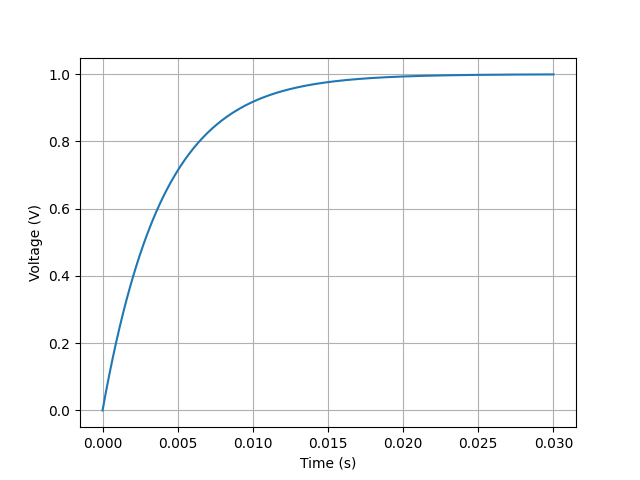

In [4]:
%matplotlib widget
ax = cct[2].v.plot((0, 30e-3))

/home/Kojjan/Documents/School/EITA10 - Elektronik/notebooks/venv/lib/python3.12/site-packages/lcapy/plot.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axes = subplots(1, **kwargs)


(<Axes: xlabel='Frequency (Hz)', ylabel='Magnitude (dB)'>,
 <Axes: xlabel='Frequency (Hz)', ylabel='Phase (radians)'>)

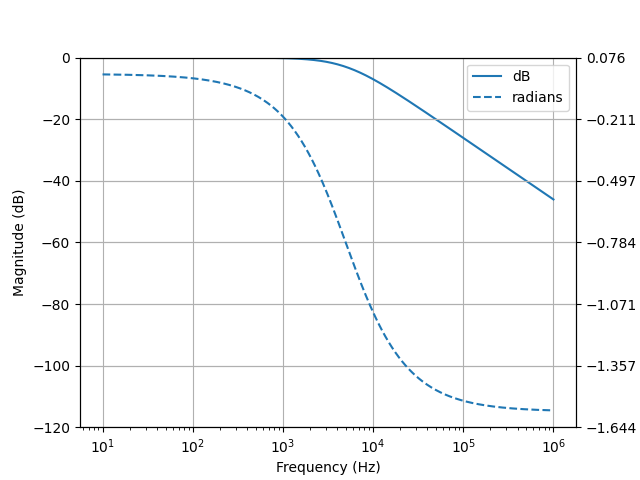

In [31]:
import matplotlib.pyplot as plt
from lcapy import R, C, s

# Component values
R_val = 680  # Ohms
C_val = 47e-9  # Farads

# Define the circuit components
resistor = R(R_val)
capacitor = C(C_val)

# Transfer function H(s) for the RC low-pass filter
H = 1 / (1 + s * R_val * C_val)

# Generate Bode plot
H.bode_plot((10, 1e6))